# Yins Timer

This notebook walks readers through the manual of using the function *YinsTimer* which currently is a installable package [here](https://github.com/yiqiao-yin/YinPortfolioManagement). 

In [7]:
# !pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git

In [2]:
from YinCapital_forecast.modules import YinsTimer

------------------------------------------------------------------------------
MANUAL: 
Try run the following line by line in a Python Notebook.

        MANUAL: To install this python package, please use the following code.

        # In a python notebook:
        # !pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git
        # In a command line:
        # pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git
        
        # Run
        start_date = '2010-01-01'
        end_date   = '2020-01-18'
        ticker = 'FB'
        temp = YinsMM.YinsTimer(
                start_date, end_date, ticker, figsize=(15,6), LB=-0.01, UB=0.01, 
                plotGraph=True, verbose=True, printManual=True, gotoSEC=True)
        
Manual ends here.
------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed


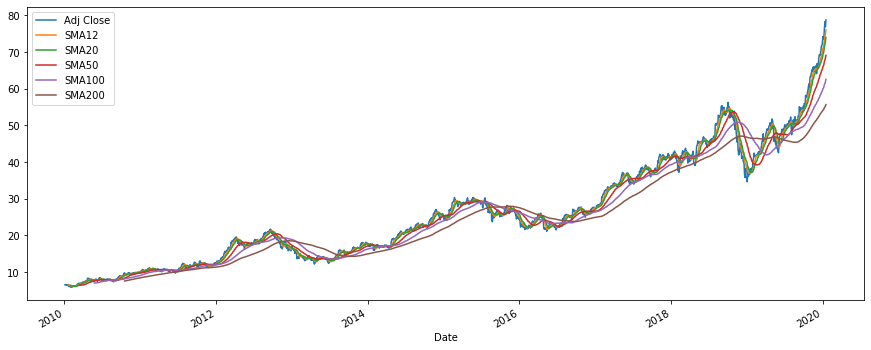

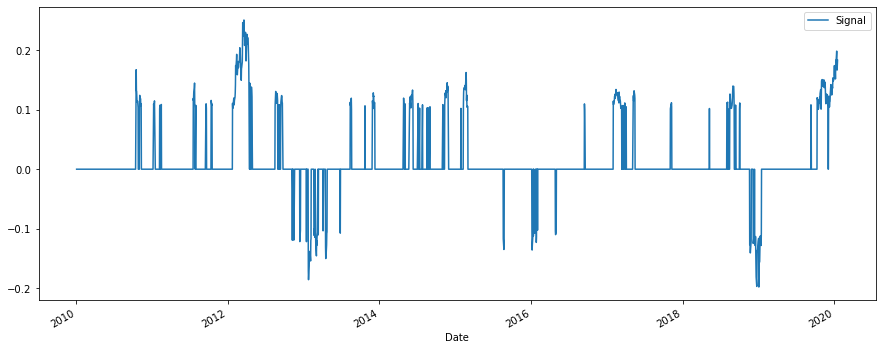

----------------------------------------------------------------------------------------------------
Entered Stock has the following information:
Ticker: AAPL
---
Expted Return: 0.0011
Expted Risk (Volatility): 0.0162
Reward-Risk Ratio (Daily Data): 0.0688
---
Tail of the 'Buy/Sell Signal' dataframe:
              Signal
Date                
2020-01-13  0.198072
2020-01-14  0.176357
2020-01-15  0.166306
2020-01-16  0.175468
2020-01-17  0.182732
Note: positive values indicate 'sell' and negative values indicate 'buy'.
---
Basic Statistics for Buy Sell Signals: {'AVE_BUY': 0.0352, 'AVE_SELL': 0.1321}
Note: Change LB and UB to ensure average buy sell signals fall beneath 2%.
---
For annual report on SEC site, please go to: 
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=AAPL&type=10-K&dateb=&owner=exclude&count=40
----------------------------------------------------------------------------------------------------
Time Consumption (in sec): 2.76
Time Consumption (in min): 0

In [8]:
start_date = '2010-01-01'
end_date   = '2020-01-18'
ticker = 'AAPL'
tmp1 = YinsTimer(
        start_date, end_date, ticker, figsize=(15,6), LB=-0.1, UB=0.1, 
        plotGraph=True, verbose=True, printManual=True, gotoSEC=True)

Ends here.